# **Mutated Genes .txt file Data Preprocessing and Latent space extraction**

In [1]:
#from os.path import normpath

#Checking the mutated genes txt file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#import tensorflow as tf
#from pyasn1_modules.rfc3280 import common_name

mutated_genes_df = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Mutated_Genes (3).txt', sep = '\t', skip_blank_lines = True, engine = 'python')
mutated_genes_df.dropna(how = 'all', inplace = True)

In [2]:
mutated_genes_df

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
PGLYRP3,NaN,1,1,499,0.2%,No
PGLYRP2,NaN,3,3,499,0.6%,No
TFRC,NaN,1,1,499,0.2%,Yes
HTR4,NaN,1,1,499,0.2%,No
PTPDC1,NaN,1,1,499,0.2%,No
...,...,...,...,...,...,...
SPRY3,NaN,1,1,499,0.2%,No
ARB2A,NaN,1,1,499,0.2%,No
ABCE1,NaN,1,1,499,0.2%,No
HCN2,NaN,1,1,499,0.2%,No


# **Inconsistencies in the Mutated Genes dataset**
The following inconsistencies have been handled in the below sections:
1. Inconsistent spaces 
2. Random exponential values

**Reading the .txt file to get each line as a list of elements separeted by `\t`**

In [3]:
#There are a lot of inconsistencies in the .txtfile which have to be handled
with open('/home/sanven0212/PycharmProjects/MultiOmicsFYP/Mutated_Genes (3).txt', 'r') as f:
    lines_of_file = f.readlines()

processed_lines = [lines.strip().split('\t') for lines in lines_of_file]

In [4]:
processed_lines[0]

['Gene',
 'MutSig(Q-value)',
 '# Mut',
 '#Profiled Samples',
 'Freq',
 'Is Cancer Gene (source: OncoKB)']

In [5]:
processed_lines[1]

['PGLYRP3', '', '1', '1', '499', '0.2%', 'No']

**From the above code cells it is evident that except the first line in the .txt file, the rest of them have additional whitespace. Removing those elements from the lists**

In [6]:
#Now removing all NaN elements
processed_lines = [[i for i in j if i.strip() != '']for j in processed_lines]

In [7]:
processed_lines

[['Gene',
  'MutSig(Q-value)',
  '# Mut',
  '#Profiled Samples',
  'Freq',
  'Is Cancer Gene (source: OncoKB)'],
 ['PGLYRP3', '1', '1', '499', '0.2%', 'No'],
 ['PGLYRP2', '3', '3', '499', '0.6%', 'No'],
 ['TFRC', '1', '1', '499', '0.2%', 'Yes'],
 ['HTR4', '1', '1', '499', '0.2%', 'No'],
 ['PTPDC1', '1', '1', '499', '0.2%', 'No'],
 ['CRHBP', '2', '2', '499', '0.4%', 'No'],
 ['HTR6', '2', '2', '499', '0.4%', 'No'],
 ['CAPNS1', '2', '2', '499', '0.4%', 'No'],
 ['SCP2', '3', '2', '499', '0.4%', 'No'],
 ['LURAP1L', '3', '3', '499', '0.6%', 'No'],
 ['BBX', '2', '2', '499', '0.4%', 'No'],
 ['PRKACA', '2', '2', '499', '0.4%', 'Yes'],
 ['SPATA31G1', '1', '1', '499', '0.2%', 'No'],
 ['ZNF17', '1', '1', '499', '0.2%', 'No'],
 ['ZNF18', '3', '2', '499', '0.4%', 'No'],
 ['ZNF19', '2', '2', '499', '0.4%', 'No'],
 ['SDS', '1', '1', '499', '0.2%', 'No'],
 ['UNC5A', '1', '1', '499', '0.2%', 'No'],
 ['UNC5B', '5', '5', '499', '1.0%', 'No'],
 ['SECISBP2', '1', '1', '499', '0.2%', 'No'],
 ['RC3H1', '2', '

In [8]:
len(processed_lines[1])

6

**There are a total of 6 feature names in the first line and therefore, checking for lines that have additional elements that have to be filtered out**

In [9]:
#Some of the lines Have more than 6 elements
for a, b in enumerate(processed_lines):
    if len(b) > 6:
        print(f'Line No: {a + 1} | Line: {b}')
        
        

Line No: 546 | Line: ['PITPNM2', '1.640e-12', '2', '1', '499', '0.2%', 'No']
Line No: 623 | Line: ['RAG1', '3.530e-2', '11', '10', '499', '2.0%', 'No']
Line No: 910 | Line: ['CDKN1B', '1.990e-2', '6', '6', '499', '1.2%', 'Yes']
Line No: 1343 | Line: ['EMG1', '1.950e-3', '4', '4', '499', '0.8%', 'No']
Line No: 1694 | Line: ['SBNO1', '5.030e-2', '6', '5', '499', '1.0%', 'No']
Line No: 1764 | Line: ['PIK3CA', '1.840e-2', '16', '14', '499', '2.8%', 'Yes']
Line No: 1812 | Line: ['VPS35L', '1.640e-12', '2', '2', '499', '0.4%', 'No']
Line No: 2123 | Line: ['TAF1L', '4.590e-2', '10', '10', '499', '2.0%', 'No']
Line No: 2771 | Line: ['HSPA8', '8.850e-2', '7', '7', '499', '1.4%', 'No']
Line No: 2927 | Line: ['OR4P4', '4.700e-3', '5', '5', '499', '1.0%', 'No']
Line No: 2955 | Line: ['EPB41L3', '2.760e-2', '15', '12', '499', '2.4%', 'No']
Line No: 3077 | Line: ['SLC27A4', '1.640e-12', '2', '2', '499', '0.4%', 'No']
Line No: 3401 | Line: ['BHLHE22', '2.680e-2', '3', '3', '499', '0.6%', 'No']
Line N

In [10]:
#The exponential values have to be removed from the lists
processed_lines = [i[:1] + i[2: ] if len(i) > 6 else i for i in processed_lines]

**Lines after removing the exponential values**

In [11]:
processed_lines

[['Gene',
  'MutSig(Q-value)',
  '# Mut',
  '#Profiled Samples',
  'Freq',
  'Is Cancer Gene (source: OncoKB)'],
 ['PGLYRP3', '1', '1', '499', '0.2%', 'No'],
 ['PGLYRP2', '3', '3', '499', '0.6%', 'No'],
 ['TFRC', '1', '1', '499', '0.2%', 'Yes'],
 ['HTR4', '1', '1', '499', '0.2%', 'No'],
 ['PTPDC1', '1', '1', '499', '0.2%', 'No'],
 ['CRHBP', '2', '2', '499', '0.4%', 'No'],
 ['HTR6', '2', '2', '499', '0.4%', 'No'],
 ['CAPNS1', '2', '2', '499', '0.4%', 'No'],
 ['SCP2', '3', '2', '499', '0.4%', 'No'],
 ['LURAP1L', '3', '3', '499', '0.6%', 'No'],
 ['BBX', '2', '2', '499', '0.4%', 'No'],
 ['PRKACA', '2', '2', '499', '0.4%', 'Yes'],
 ['SPATA31G1', '1', '1', '499', '0.2%', 'No'],
 ['ZNF17', '1', '1', '499', '0.2%', 'No'],
 ['ZNF18', '3', '2', '499', '0.4%', 'No'],
 ['ZNF19', '2', '2', '499', '0.4%', 'No'],
 ['SDS', '1', '1', '499', '0.2%', 'No'],
 ['UNC5A', '1', '1', '499', '0.2%', 'No'],
 ['UNC5B', '5', '5', '499', '1.0%', 'No'],
 ['SECISBP2', '1', '1', '499', '0.2%', 'No'],
 ['RC3H1', '2', '

**Structured mutated genes dataframe**

In [12]:
mutated_genes_df = pd.DataFrame(processed_lines[1: ], columns = processed_lines[0])

In [13]:
mutated_genes_df.head()

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
0,PGLYRP3,1,1,499,0.2%,No
1,PGLYRP2,3,3,499,0.6%,No
2,TFRC,1,1,499,0.2%,Yes
3,HTR4,1,1,499,0.2%,No
4,PTPDC1,1,1,499,0.2%,No


In [14]:
mutated_genes_df.shape

(11290, 6)

**Note: The mutated genes dataframe has 11290 samples with 6 features each**

**Saving the dataframe as a .CSV file**

In [15]:
#Saving it as a .csv file
mutated_genes_df.to_csv('Mutated_Genes.csv', index = False)

In [16]:
mutated_genes_df

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
0,PGLYRP3,1,1,499,0.2%,No
1,PGLYRP2,3,3,499,0.6%,No
2,TFRC,1,1,499,0.2%,Yes
3,HTR4,1,1,499,0.2%,No
4,PTPDC1,1,1,499,0.2%,No
...,...,...,...,...,...,...
11285,SPRY3,1,1,499,0.2%,No
11286,ARB2A,1,1,499,0.2%,No
11287,ABCE1,1,1,499,0.2%,No
11288,HCN2,1,1,499,0.2%,No


In [17]:
processed_gleason_df = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Balanced_Gleason_Score_Dataset.csv')
processed_gleason_df.head()

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
0,0.575079,0.587133,0.922717,0.234906,0.748240,0.472291,0.554445,0.800431,0.209846,0.968074,...,0.211153,0.510356,0.759293,0.071506,0.387823,0.931180,0.163421,0.385668,0.866652,0
1,0.537323,0.651585,0.854902,0.292120,0.490203,0.545553,0.473597,0.775988,0.363620,0.821883,...,0.308363,1.000000,0.814994,0.033682,0.302847,0.922685,0.165114,0.386124,0.915704,0
2,0.386981,0.582482,0.625047,0.629923,0.651290,0.848843,0.370622,0.543530,0.454566,0.398550,...,0.068059,0.287613,0.503656,0.042003,0.446778,0.961520,0.322456,0.674538,0.912000,1
3,0.227620,0.672938,0.530553,0.381428,0.175972,0.824114,0.690394,0.603873,0.581930,0.815111,...,0.007223,0.288589,0.872192,0.069334,0.125432,0.929922,0.232844,0.000000,0.942248,0
4,0.391386,0.539218,0.905188,0.375629,0.809590,0.510654,0.483783,0.744336,0.323944,0.919157,...,0.300174,0.267242,0.539900,0.127723,0.409610,0.925696,0.192795,0.520819,0.866199,0


In [18]:
mutated_genes_df[mutated_genes_df['Gene'] == 'SPOP']

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
8410,SPOP,58,57,499,11.4%,Yes


**Getting the data for the actively mutating genes from mutated genes dataset**

In [19]:
active_mut_ge = [cols.split('_')[1] for cols in processed_gleason_df.columns if cols.startswith('GE')]
active_mut_ge
#actively_mutating_genes_df = mutated_genes_df[mutated_genes_df['Gene'] == ]

['SPOP',
 'FOXA1',
 'CTNNB1',
 'CLPTM1L',
 'DPYSL2',
 'NEIL1',
 'PITPNM2',
 'ATM',
 'EMG1',
 'ETV3',
 'BRAF',
 'NKX3-1',
 'ZMYM3',
 'SALL1']

In [20]:
#Now retrieving only those details from mutated_genes dataset that contain actively mutating genes
active_mut_df = mutated_genes_df[mutated_genes_df['Gene'].isin(active_mut_ge)]

In [21]:
active_mut_df

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
544,PITPNM2,2,1,499,0.2%,No
1341,EMG1,4,4,499,0.8%,No
3656,SALL1,13,12,499,2.4%,No
5377,ZMYM3,13,12,499,2.4%,Yes
5627,DPYSL2,2,2,499,0.4%,No
5847,CLPTM1L,3,2,499,0.4%,No
5863,NKX3-1,5,5,499,1.0%,Yes
6179,ETV3,5,5,499,1.0%,No
6675,NEIL1,2,2,499,0.4%,No
7465,FOXA1,29,28,499,5.6%,Yes


In [22]:
processed_gleason_df

,GE_SPOP,GE_FOXA1,GE_CTNNB1,GE_CLPTM1L,GE_DPYSL2,GE_NEIL1,GE_PITPNM2,GE_ATM,GE_EMG1,GE_ETV3,...,DM_NEIL1,DM_SLC27A4,DM_PITPNM2,DM_PTEN,DM_EMG1,DM_ETV3,DM_BRAF,DM_NKX3-1,DM_SALL1,TUMOR_STAGE
0,0.575079,0.587133,0.922717,0.234906,0.748240,0.472291,0.554445,0.800431,0.209846,0.968074,...,0.211153,0.510356,0.759293,0.071506,0.387823,0.931180,0.163421,0.385668,0.866652,0
1,0.537323,0.651585,0.854902,0.292120,0.490203,0.545553,0.473597,0.775988,0.363620,0.821883,...,0.308363,1.000000,0.814994,0.033682,0.302847,0.922685,0.165114,0.386124,0.915704,0
2,0.386981,0.582482,0.625047,0.629923,0.651290,0.848843,0.370622,0.543530,0.454566,0.398550,...,0.068059,0.287613,0.503656,0.042003,0.446778,0.961520,0.322456,0.674538,0.912000,1
3,0.227620,0.672938,0.530553,0.381428,0.175972,0.824114,0.690394,0.603873,0.581930,0.815111,...,0.007223,0.288589,0.872192,0.069334,0.125432,0.929922,0.232844,0.000000,0.942248,0
4,0.391386,0.539218,0.905188,0.375629,0.809590,0.510654,0.483783,0.744336,0.323944,0.919157,...,0.300174,0.267242,0.539900,0.127723,0.409610,0.925696,0.192795,0.520819,0.866199,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.557279,0.668062,0.716778,0.461685,0.447715,0.665308,0.685921,0.623949,0.386367,0.769133,...,0.135824,0.344780,0.761523,0.105973,0.165160,0.901504,0.277806,0.284653,0.828625,0
286,0.654281,0.436268,0.704380,0.359377,0.698625,0.605353,0.908942,0.456691,0.472161,0.709531,...,0.263871,0.560218,0.649019,0.046348,0.612370,0.925217,0.223666,0.519095,0.723633,0
287,0.406139,0.429788,0.675112,0.392159,0.676224,0.620942,0.470348,0.442154,0.633134,0.586738,...,0.404938,0.333120,0.844538,0.068139,0.384597,0.980951,0.339410,0.266695,0.599212,1
288,0.605638,0.566355,0.847963,0.246558,0.776904,0.595867,0.545772,0.722747,0.337414,0.876418,...,0.267997,0.563866,0.544564,0.048979,0.530474,0.925479,0.190595,0.626709,0.718878,1


In [23]:
#Now we know that each entry for the processed_df_gleason is for a specific sample or patient
#Therefore adding a new col called sample ID to the processed_df_gleason
gene_columns = [col for col in processed_gleason_df.columns if col.startswith(('GE_', 'CNA_', 'DM_'))]
genes = list(set([col.split('_')[1] for col in gene_columns]))

# **Combined Analysis of multi-omics gleason score and mutating genes dataset**
1. Filtering out the cancer causing genes from the mutated genes dataset
2. Retaining only the omics that correspond to the cancer causing genes
3. Converting the object features from mutated genes dataset to float
4. Observing the correlation between the features in the mutated genes dataset
5. Observing how mutation signatures and no of mutations are related
6. Taking only the top 3 mutating cancer genes and appending their data to the gleason dataset

**Checking the no of cancer causing genes**

In [24]:
mutated_genes_df[mutated_genes_df['Is Cancer Gene (source: OncoKB)'] == 'Yes']['Gene']

2           TFRC
11        PRKACA
26           BCR
46         ZNF24
70       PPFIBP1
          ...   
11231      CILK1
11253       TFPT
11257      MUTYH
11282       H3-5
11283       H3-4
Name: Gene, Length: 835, dtype: object

In [25]:
len(genes)

19

**Retrieving a list of cancer genes that are common to gleason and the mutating genes dataset**

In [26]:
#Checking if all the cancer causing genes are there in gleason_df
k = 0
cancer_genes = [i for i in genes if i in mutated_genes_df[mutated_genes_df['Is Cancer Gene (source: OncoKB)'] == 'Yes']['Gene'].values]


In [27]:
cancer_genes

['SPOP',
 'CTNNB1',
 'TP53',
 'BRAF',
 'NKX3-1',
 'ATM',
 'MED12',
 'FOXA1',
 'PTEN',
 'ZMYM3']

In [28]:
len(cancer_genes)

10

**Getting a GE, CNA and DM omics features list from the gleason dataset**

In [29]:
#Getting a list of omics for these genes alone from the first dataset
GE_List = [f'GE_{i}' for i in cancer_genes if f'GE_{i}' in processed_gleason_df.columns]

In [30]:
GE_List

['GE_SPOP',
 'GE_CTNNB1',
 'GE_BRAF',
 'GE_NKX3-1',
 'GE_ATM',
 'GE_FOXA1',
 'GE_ZMYM3']

In [31]:
CNA_List = [f'CNA_{i}' for i in cancer_genes if f'CNA_{i}' in processed_gleason_df.columns]
CNA_List

['CNA_SPOP',
 'CNA_CTNNB1',
 'CNA_TP53',
 'CNA_BRAF',
 'CNA_ATM',
 'CNA_MED12',
 'CNA_FOXA1',
 'CNA_PTEN',
 'CNA_ZMYM3']

In [32]:
DM_List = [f'DM_{i}' for i in cancer_genes if f'DM_{i}' in processed_gleason_df.columns]
DM_List

['DM_SPOP', 'DM_CTNNB1', 'DM_BRAF', 'DM_NKX3-1', 'DM_FOXA1', 'DM_PTEN']

**Appending all of these features to get the list of relevant features that have to be retained for the gleason dataset**

In [33]:
#Retaining just the required features from the gleason dataset
gleason_df_cols_list = GE_List + CNA_List + DM_List
gleason_df_cols_list


['GE_SPOP',
 'GE_CTNNB1',
 'GE_BRAF',
 'GE_NKX3-1',
 'GE_ATM',
 'GE_FOXA1',
 'GE_ZMYM3',
 'CNA_SPOP',
 'CNA_CTNNB1',
 'CNA_TP53',
 'CNA_BRAF',
 'CNA_ATM',
 'CNA_MED12',
 'CNA_FOXA1',
 'CNA_PTEN',
 'CNA_ZMYM3',
 'DM_SPOP',
 'DM_CTNNB1',
 'DM_BRAF',
 'DM_NKX3-1',
 'DM_FOXA1',
 'DM_PTEN']

In [34]:
final_processed_gleason_df_dataset = processed_gleason_df[gleason_df_cols_list]

In [35]:
final_processed_gleason_df_dataset

,GE_SPOP,GE_CTNNB1,GE_BRAF,GE_NKX3-1,GE_ATM,GE_FOXA1,GE_ZMYM3,CNA_SPOP,CNA_CTNNB1,CNA_TP53,...,CNA_MED12,CNA_FOXA1,CNA_PTEN,CNA_ZMYM3,DM_SPOP,DM_CTNNB1,DM_BRAF,DM_NKX3-1,DM_FOXA1,DM_PTEN
0,0.575079,0.922717,0.523916,0.802229,0.800431,0.587133,0.899082,0.363522,0.521688,0.926958,...,0.758759,0.347544,0.214321,0.758759,0.760940,0.787483,0.163421,0.385668,0.122041,0.071506
1,0.537323,0.854902,0.474227,0.790006,0.775988,0.651585,0.845894,0.387421,0.518171,0.945030,...,0.730731,0.358665,0.637037,0.730731,0.800405,0.859578,0.165114,0.386124,0.081913,0.033682
2,0.386981,0.625047,0.156280,0.598678,0.543530,0.582482,0.687467,0.392941,0.552238,0.942435,...,0.787766,0.321323,0.401570,0.786507,0.771626,0.806984,0.322456,0.674538,0.115456,0.042003
3,0.227620,0.530553,0.436665,0.767072,0.603873,0.672938,0.878262,0.277987,0.488863,0.520331,...,0.734735,0.278035,0.565926,0.734735,0.873624,0.989734,0.232844,0.000000,0.018257,0.069334
4,0.391386,0.905188,0.493164,0.649094,0.744336,0.539218,0.718629,0.408176,0.530481,0.983434,...,0.747748,0.361446,0.113580,0.747748,0.802153,0.817452,0.192795,0.520819,0.240073,0.127723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.557279,0.716778,0.379839,0.671578,0.623949,0.668062,0.785032,0.393711,0.520516,0.963102,...,0.745746,0.357275,0.641481,0.745746,0.786896,0.902319,0.277806,0.284653,0.138077,0.105973
286,0.654281,0.704380,0.183508,0.709343,0.456691,0.436268,0.717918,0.400629,0.517585,0.971386,...,0.781782,0.356812,0.638519,0.781782,0.325714,0.736314,0.223666,0.519095,0.165414,0.046348
287,0.406139,0.675112,0.442115,0.520185,0.442154,0.429788,0.642336,0.594358,0.488329,0.927395,...,0.730424,0.357517,0.674533,0.790796,0.787256,0.903745,0.339410,0.266695,0.098590,0.068139
288,0.605638,0.847963,0.472175,0.566869,0.722747,0.566355,0.609356,0.397484,0.518757,0.967620,...,0.771772,0.358665,0.304691,0.771772,0.694606,0.621788,0.190595,0.626709,0.166039,0.048979


**Appending the gleason score to the dataset to obtain the final processed gleason dataframe**

In [36]:
final_processed_gleason_df_dataset['Gleason_Score'] = processed_gleason_df['TUMOR_STAGE']

/tmp/ipykernel_7780/1518279996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_gleason_df_dataset['Gleason_Score'] = processed_gleason_df['TUMOR_STAGE']


In [37]:
final_processed_gleason_df_dataset

,GE_SPOP,GE_CTNNB1,GE_BRAF,GE_NKX3-1,GE_ATM,GE_FOXA1,GE_ZMYM3,CNA_SPOP,CNA_CTNNB1,CNA_TP53,...,CNA_FOXA1,CNA_PTEN,CNA_ZMYM3,DM_SPOP,DM_CTNNB1,DM_BRAF,DM_NKX3-1,DM_FOXA1,DM_PTEN,Gleason_Score
0,0.575079,0.922717,0.523916,0.802229,0.800431,0.587133,0.899082,0.363522,0.521688,0.926958,...,0.347544,0.214321,0.758759,0.760940,0.787483,0.163421,0.385668,0.122041,0.071506,0
1,0.537323,0.854902,0.474227,0.790006,0.775988,0.651585,0.845894,0.387421,0.518171,0.945030,...,0.358665,0.637037,0.730731,0.800405,0.859578,0.165114,0.386124,0.081913,0.033682,0
2,0.386981,0.625047,0.156280,0.598678,0.543530,0.582482,0.687467,0.392941,0.552238,0.942435,...,0.321323,0.401570,0.786507,0.771626,0.806984,0.322456,0.674538,0.115456,0.042003,1
3,0.227620,0.530553,0.436665,0.767072,0.603873,0.672938,0.878262,0.277987,0.488863,0.520331,...,0.278035,0.565926,0.734735,0.873624,0.989734,0.232844,0.000000,0.018257,0.069334,0
4,0.391386,0.905188,0.493164,0.649094,0.744336,0.539218,0.718629,0.408176,0.530481,0.983434,...,0.361446,0.113580,0.747748,0.802153,0.817452,0.192795,0.520819,0.240073,0.127723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.557279,0.716778,0.379839,0.671578,0.623949,0.668062,0.785032,0.393711,0.520516,0.963102,...,0.357275,0.641481,0.745746,0.786896,0.902319,0.277806,0.284653,0.138077,0.105973,0
286,0.654281,0.704380,0.183508,0.709343,0.456691,0.436268,0.717918,0.400629,0.517585,0.971386,...,0.356812,0.638519,0.781782,0.325714,0.736314,0.223666,0.519095,0.165414,0.046348,0
287,0.406139,0.675112,0.442115,0.520185,0.442154,0.429788,0.642336,0.594358,0.488329,0.927395,...,0.357517,0.674533,0.790796,0.787256,0.903745,0.339410,0.266695,0.098590,0.068139,1
288,0.605638,0.847963,0.472175,0.566869,0.722747,0.566355,0.609356,0.397484,0.518757,0.967620,...,0.358665,0.304691,0.771772,0.694606,0.621788,0.190595,0.626709,0.166039,0.048979,1


In [38]:
mutated_genes_df.describe()

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
count,11290,11290,11290,11290,11290,11290
unique,11290,36,34,1,34,2
top,PGLYRP3,1,1,499,0.2%,No
freq,1,5172,5471,11290,5471,10455


**Note: Description of mutated genes dataset**

**Getting the maximum mutation signature value for the cancer genes**

In [39]:
max(mutated_genes_df['MutSig(Q-value)'][mutated_genes_df['Is Cancer Gene (source: OncoKB)'] == 'Yes']) 

'9'

**Checking the top mutating genes**

In [40]:

mutated_genes_df.sort_values(by = '# Mut', ascending = False)[mutated_genes_df['Is Cancer Gene (source: OncoKB)'] == 'Yes']

/tmp/ipykernel_7780/1851049704.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mutated_genes_df.sort_values(by = '# Mut', ascending = False)[mutated_genes_df['Is Cancer Gene (source: OncoKB)'] == 'Yes']


,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
4637,BRCA2,9,9,499,1.8%,Yes
7779,CDK12,14,9,499,1.8%,Yes
4757,ARID2,9,9,499,1.8%,Yes
10062,PTPRC,8,8,499,1.6%,Yes
2841,ARID1A,8,8,499,1.6%,Yes
...,...,...,...,...,...,...
6931,LTK,1,1,499,0.2%,Yes
2845,LATS1,1,1,499,0.2%,Yes
2846,LATS2,1,1,499,0.2%,Yes
7074,FSTL3,1,1,499,0.2%,Yes


In [41]:
mutated_genes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11290 entries, 0 to 11289
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gene                             11290 non-null  object
 1   MutSig(Q-value)                  11290 non-null  object
 2   # Mut                            11290 non-null  object
 3   #Profiled Samples                11290 non-null  object
 4   Freq                             11290 non-null  object
 5   Is Cancer Gene (source: OncoKB)  11290 non-null  object
dtypes: object(6)
memory usage: 529.3+ KB


**Custom function to strip the `%` from the values in the Freq feature and return a float value of Freq divided by 100**

In [42]:
def Freq_mod(freq):
    freq = freq.split('%')[0]
    freq = float(freq)
    return freq / 100

In [43]:
mutated_genes_df['Freq'] = mutated_genes_df['Freq'].apply(Freq_mod)

In [44]:
mutated_genes_df

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
0,PGLYRP3,1,1,499,0.002,No
1,PGLYRP2,3,3,499,0.006,No
2,TFRC,1,1,499,0.002,Yes
3,HTR4,1,1,499,0.002,No
4,PTPDC1,1,1,499,0.002,No
...,...,...,...,...,...,...
11285,SPRY3,1,1,499,0.002,No
11286,ARB2A,1,1,499,0.002,No
11287,ABCE1,1,1,499,0.002,No
11288,HCN2,1,1,499,0.002,No


**Conversion of data type of features from MutSig(Q-value) value to Freq to float**

In [45]:
#Converting the cols from multisig to Freq to float32
mutated_genes_df[mutated_genes_df.columns[1: 5]] = mutated_genes_df[mutated_genes_df.columns[1: 5]].astype(float)

In [46]:
mutated_genes_df

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
0,PGLYRP3,1.0,1.0,499.0,0.002,No
1,PGLYRP2,3.0,3.0,499.0,0.006,No
2,TFRC,1.0,1.0,499.0,0.002,Yes
3,HTR4,1.0,1.0,499.0,0.002,No
4,PTPDC1,1.0,1.0,499.0,0.002,No
...,...,...,...,...,...,...
11285,SPRY3,1.0,1.0,499.0,0.002,No
11286,ARB2A,1.0,1.0,499.0,0.002,No
11287,ABCE1,1.0,1.0,499.0,0.002,No
11288,HCN2,1.0,1.0,499.0,0.002,No


**Checking the no of cancer causing genes and normal ones**

In [47]:
mutated_genes_df['Is Cancer Gene (source: OncoKB)'].value_counts()

Is Cancer Gene (source: OncoKB)
No     10455
Yes      835
Name: count, dtype: int64

**Encoding the target feature of mutating genes dataset such that Yes->1 and No->0**

In [48]:
mutated_genes_df['Is Cancer Gene (source: OncoKB)'] = mutated_genes_df['Is Cancer Gene (source: OncoKB)'].apply(lambda x: 0 if x =='No' else 1)

In [49]:
mutated_genes_df

,Gene,MutSig(Q-value),# Mut,#Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
0,PGLYRP3,1.0,1.0,499.0,0.002,0
1,PGLYRP2,3.0,3.0,499.0,0.006,0
2,TFRC,1.0,1.0,499.0,0.002,1
3,HTR4,1.0,1.0,499.0,0.002,0
4,PTPDC1,1.0,1.0,499.0,0.002,0
...,...,...,...,...,...,...
11285,SPRY3,1.0,1.0,499.0,0.002,0
11286,ARB2A,1.0,1.0,499.0,0.002,0
11287,ABCE1,1.0,1.0,499.0,0.002,0
11288,HCN2,1.0,1.0,499.0,0.002,0


**Plotting a heatmap to check the correlation between the features of the mutating genes dataset**

<Axes: >

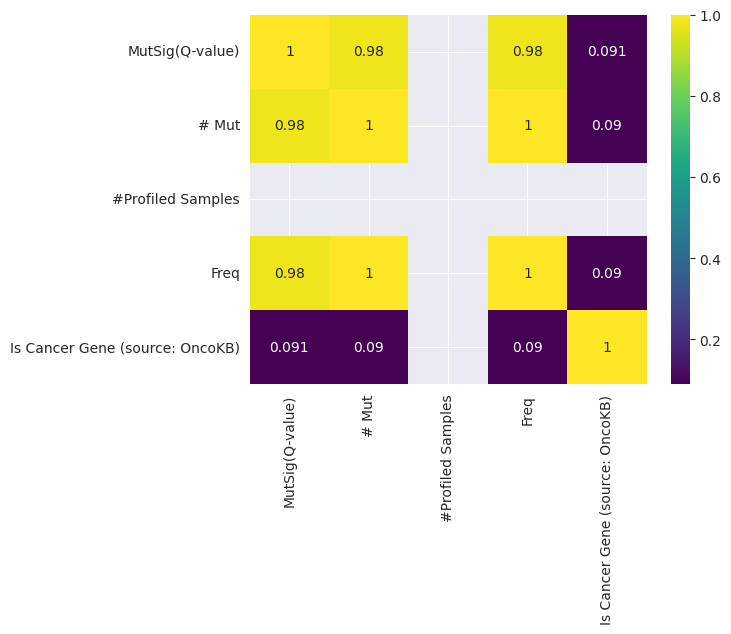

In [50]:
#Checking the correlation between the features
sb.heatmap(mutated_genes_df.drop('Gene', axis = 1).corr(), annot = True, cmap = 'viridis')

**Note: From the above code it is evident that the #Profiled Samples have no correlation to the target feature. Therefore it is better to drop that feature**

In [51]:
#From the above heatmap it is very evident that profiled samples feature has no correlation with any of the features including the target
#Therefore discarding the feature
mutated_genes_df.drop('#Profiled Samples', axis = 1, inplace = True)

In [52]:
mutated_genes_df

,Gene,MutSig(Q-value),# Mut,Freq,Is Cancer Gene (source: OncoKB)
0,PGLYRP3,1.0,1.0,0.002,0
1,PGLYRP2,3.0,3.0,0.006,0
2,TFRC,1.0,1.0,0.002,1
3,HTR4,1.0,1.0,0.002,0
4,PTPDC1,1.0,1.0,0.002,0
...,...,...,...,...,...
11285,SPRY3,1.0,1.0,0.002,0
11286,ARB2A,1.0,1.0,0.002,0
11287,ABCE1,1.0,1.0,0.002,0
11288,HCN2,1.0,1.0,0.002,0


**Scatterplot to visualize how MutSig(Q-value) and # Mut are related**

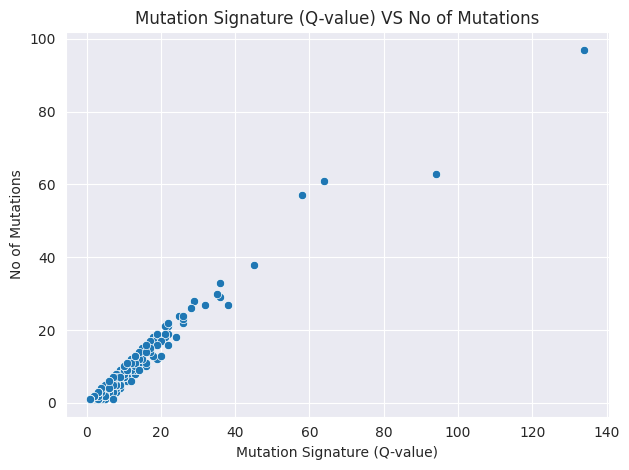

In [53]:
sb.scatterplot(mutated_genes_df, x = 'MutSig(Q-value)', y = '# Mut')
plt.title('Mutation Signature (Q-value) VS No of Mutations')
plt.xlabel('Mutation Signature (Q-value)')
plt.ylabel('No of Mutations')
plt.tight_layout()

**From the above graph it is evident that with an increase in Q-value, No of Mutations also increase**

**Retaining only cancer samples from the mutated genes dataset**

In [54]:
#Getting only the cancer causing genes data from the 2nd dataframe
mutated_genes_cancer_df = mutated_genes_df[mutated_genes_df['Is Cancer Gene (source: OncoKB)'] == 1]

In [55]:
mutated_genes_cancer_df

,Gene,MutSig(Q-value),# Mut,Freq,Is Cancer Gene (source: OncoKB)
2,TFRC,1.0,1.0,0.002,1
11,PRKACA,2.0,2.0,0.004,1
26,BCR,2.0,2.0,0.004,1
46,ZNF24,1.0,1.0,0.002,1
70,PPFIBP1,5.0,4.0,0.008,1
...,...,...,...,...,...
11231,CILK1,2.0,2.0,0.004,1
11253,TFPT,1.0,1.0,0.002,1
11257,MUTYH,1.0,1.0,0.002,1
11282,H3-5,1.0,1.0,0.002,1


**Getting the omics for only the common genes in both the datasets**

In [56]:
#Getting only those genes that are common to both the dataframes
#Getting a list of unique genes columns
common_genes = set([i.split('_')[1]for i in final_processed_gleason_df_dataset.columns[:-1]])
common_genes

{'ATM',
 'BRAF',
 'CTNNB1',
 'FOXA1',
 'MED12',
 'NKX3-1',
 'PTEN',
 'SPOP',
 'TP53',
 'ZMYM3'}

In [57]:
len(common_genes)

10

In [58]:
mutated_genes_cancer_df =  mutated_genes_cancer_df[mutated_genes_cancer_df['Gene'].isin(list(common_genes))]

In [59]:
mutated_genes_cancer_df

,Gene,MutSig(Q-value),# Mut,Freq,Is Cancer Gene (source: OncoKB)
5377,ZMYM3,13.0,12.0,0.024,1
5853,PTEN,17.0,17.0,0.034,1
5863,NKX3-1,5.0,5.0,0.010,1
5964,TP53,64.0,61.0,0.122,1
7465,FOXA1,29.0,28.0,0.056,1
8351,MED12,8.0,8.0,0.016,1
8410,SPOP,58.0,57.0,0.114,1
10602,BRAF,8.0,8.0,0.016,1
11009,ATM,22.0,22.0,0.044,1
11074,CTNNB1,13.0,13.0,0.026,1


In [60]:
final_processed_gleason_df_dataset

,GE_SPOP,GE_CTNNB1,GE_BRAF,GE_NKX3-1,GE_ATM,GE_FOXA1,GE_ZMYM3,CNA_SPOP,CNA_CTNNB1,CNA_TP53,...,CNA_FOXA1,CNA_PTEN,CNA_ZMYM3,DM_SPOP,DM_CTNNB1,DM_BRAF,DM_NKX3-1,DM_FOXA1,DM_PTEN,Gleason_Score
0,0.575079,0.922717,0.523916,0.802229,0.800431,0.587133,0.899082,0.363522,0.521688,0.926958,...,0.347544,0.214321,0.758759,0.760940,0.787483,0.163421,0.385668,0.122041,0.071506,0
1,0.537323,0.854902,0.474227,0.790006,0.775988,0.651585,0.845894,0.387421,0.518171,0.945030,...,0.358665,0.637037,0.730731,0.800405,0.859578,0.165114,0.386124,0.081913,0.033682,0
2,0.386981,0.625047,0.156280,0.598678,0.543530,0.582482,0.687467,0.392941,0.552238,0.942435,...,0.321323,0.401570,0.786507,0.771626,0.806984,0.322456,0.674538,0.115456,0.042003,1
3,0.227620,0.530553,0.436665,0.767072,0.603873,0.672938,0.878262,0.277987,0.488863,0.520331,...,0.278035,0.565926,0.734735,0.873624,0.989734,0.232844,0.000000,0.018257,0.069334,0
4,0.391386,0.905188,0.493164,0.649094,0.744336,0.539218,0.718629,0.408176,0.530481,0.983434,...,0.361446,0.113580,0.747748,0.802153,0.817452,0.192795,0.520819,0.240073,0.127723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.557279,0.716778,0.379839,0.671578,0.623949,0.668062,0.785032,0.393711,0.520516,0.963102,...,0.357275,0.641481,0.745746,0.786896,0.902319,0.277806,0.284653,0.138077,0.105973,0
286,0.654281,0.704380,0.183508,0.709343,0.456691,0.436268,0.717918,0.400629,0.517585,0.971386,...,0.356812,0.638519,0.781782,0.325714,0.736314,0.223666,0.519095,0.165414,0.046348,0
287,0.406139,0.675112,0.442115,0.520185,0.442154,0.429788,0.642336,0.594358,0.488329,0.927395,...,0.357517,0.674533,0.790796,0.787256,0.903745,0.339410,0.266695,0.098590,0.068139,1
288,0.605638,0.847963,0.472175,0.566869,0.722747,0.566355,0.609356,0.397484,0.518757,0.967620,...,0.358665,0.304691,0.771772,0.694606,0.621788,0.190595,0.626709,0.166039,0.048979,1


**Note: Final gleason score dataset with 10 unqiue genes and their corresponding omics for CNA, DM and GE**

**Visualizing which cancer gene has the highest mutation signatures and corresponding no of mutations**

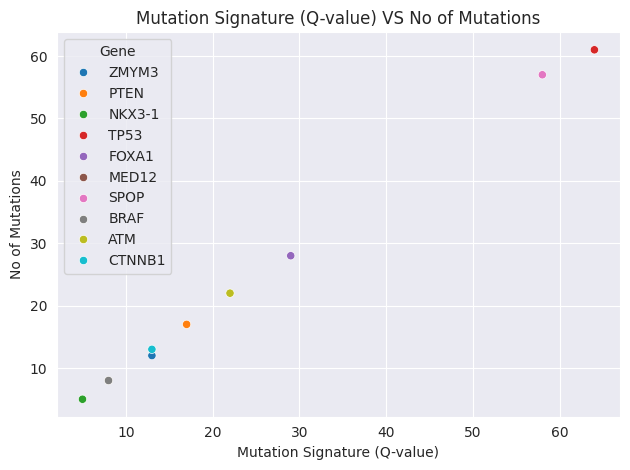

In [61]:
sb.scatterplot(mutated_genes_cancer_df, x = 'MutSig(Q-value)', y = '# Mut', hue = 'Gene')
plt.title('Mutation Signature (Q-value) VS No of Mutations')
plt.xlabel('Mutation Signature (Q-value)')
plt.ylabel('No of Mutations')
plt.tight_layout()

In [62]:
mutated_genes_cancer_df.shape

(10, 5)

**Preparing separate features for 3 cancer causing genes and their mutation signatures, no of mutations and frequencies**

In [63]:
#From the above plot it is evident that TP53, SPOP and FOXA1 have very high Q-values and high number of mutations
#Taking those 3 gene specific features alone for analysis
#TP53
TP53_Q = 64.0
TP53_Mut = 61.0
TP53_Freq = 0.122
#SPOP
SPOP_Q = 58.0
SPOP_Mut = 57.0
SPOP_Freq = 0.114
#FOXA1
FOXA1_Q = 29.0
FOXA1_Mut = 0.056
FOXA1_Freq = 0.122

In [64]:
#Appending 9 new features to the gleason dataset
#Qvalues
final_processed_gleason_df_dataset['MutSig_(Q-value)_TP53'] = TP53_Q
final_processed_gleason_df_dataset['MutSig_(Q-value)_SPOP'] = SPOP_Q
final_processed_gleason_df_dataset['MutSig_(Q-value)_FOXA1'] = FOXA1_Q
#Mutations
final_processed_gleason_df_dataset['Mut_TP53'] = TP53_Mut
final_processed_gleason_df_dataset['Mut_SPOP'] = SPOP_Mut
final_processed_gleason_df_dataset['Mut_FOXA1'] = FOXA1_Mut
#Freq
final_processed_gleason_df_dataset['Freq_TP53'] = TP53_Freq
final_processed_gleason_df_dataset['Freq_SPOP'] = SPOP_Freq
final_processed_gleason_df_dataset['Freq_FOXA1'] = FOXA1_Freq

/tmp/ipykernel_7780/200495221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_gleason_df_dataset['MutSig_(Q-value)_TP53'] = TP53_Q
/tmp/ipykernel_7780/200495221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_gleason_df_dataset['MutSig_(Q-value)_SPOP'] = SPOP_Q
/tmp/ipykernel_7780/200495221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

**Final dataframe obtained by combining data from gleason dataframe and mutating genes dataframe**

In [65]:
final_processed_gleason_df_dataset

,GE_SPOP,GE_CTNNB1,GE_BRAF,GE_NKX3-1,GE_ATM,GE_FOXA1,GE_ZMYM3,CNA_SPOP,CNA_CTNNB1,CNA_TP53,...,Gleason_Score,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1
0,0.575079,0.922717,0.523916,0.802229,0.800431,0.587133,0.899082,0.363522,0.521688,0.926958,...,0,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122
1,0.537323,0.854902,0.474227,0.790006,0.775988,0.651585,0.845894,0.387421,0.518171,0.945030,...,0,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122
2,0.386981,0.625047,0.156280,0.598678,0.543530,0.582482,0.687467,0.392941,0.552238,0.942435,...,1,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122
3,0.227620,0.530553,0.436665,0.767072,0.603873,0.672938,0.878262,0.277987,0.488863,0.520331,...,0,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122
4,0.391386,0.905188,0.493164,0.649094,0.744336,0.539218,0.718629,0.408176,0.530481,0.983434,...,0,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.557279,0.716778,0.379839,0.671578,0.623949,0.668062,0.785032,0.393711,0.520516,0.963102,...,0,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122
286,0.654281,0.704380,0.183508,0.709343,0.456691,0.436268,0.717918,0.400629,0.517585,0.971386,...,0,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122
287,0.406139,0.675112,0.442115,0.520185,0.442154,0.429788,0.642336,0.594358,0.488329,0.927395,...,1,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122
288,0.605638,0.847963,0.472175,0.566869,0.722747,0.566355,0.609356,0.397484,0.518757,0.967620,...,1,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122


In [66]:
#Appending Gleason score to the end of the dataframe
Gleason_Score = final_processed_gleason_df_dataset['Gleason_Score'].values
final_processed_gleason_df_dataset.drop('Gleason_Score', axis = 1, inplace = True)
final_processed_gleason_df_dataset['Gleason_Score'] = Gleason_Score

/tmp/ipykernel_7780/2598221892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_gleason_df_dataset.drop('Gleason_Score', axis = 1, inplace = True)
/tmp/ipykernel_7780/2598221892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_gleason_df_dataset['Gleason_Score'] = Gleason_Score


In [67]:
final_processed_gleason_df_dataset

,GE_SPOP,GE_CTNNB1,GE_BRAF,GE_NKX3-1,GE_ATM,GE_FOXA1,GE_ZMYM3,CNA_SPOP,CNA_CTNNB1,CNA_TP53,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0.575079,0.922717,0.523916,0.802229,0.800431,0.587133,0.899082,0.363522,0.521688,0.926958,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,0
1,0.537323,0.854902,0.474227,0.790006,0.775988,0.651585,0.845894,0.387421,0.518171,0.945030,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,0
2,0.386981,0.625047,0.156280,0.598678,0.543530,0.582482,0.687467,0.392941,0.552238,0.942435,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,1
3,0.227620,0.530553,0.436665,0.767072,0.603873,0.672938,0.878262,0.277987,0.488863,0.520331,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,0
4,0.391386,0.905188,0.493164,0.649094,0.744336,0.539218,0.718629,0.408176,0.530481,0.983434,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.557279,0.716778,0.379839,0.671578,0.623949,0.668062,0.785032,0.393711,0.520516,0.963102,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,0
286,0.654281,0.704380,0.183508,0.709343,0.456691,0.436268,0.717918,0.400629,0.517585,0.971386,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,0
287,0.406139,0.675112,0.442115,0.520185,0.442154,0.429788,0.642336,0.594358,0.488329,0.927395,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,1
288,0.605638,0.847963,0.472175,0.566869,0.722747,0.566355,0.609356,0.397484,0.518757,0.967620,...,64.0,58.0,29.0,61.0,57.0,0.056,0.122,0.114,0.122,1


**Checking the description and statistics for the combined dataset**

In [68]:
final_processed_gleason_df_dataset.describe()

,GE_SPOP,GE_CTNNB1,GE_BRAF,GE_NKX3-1,GE_ATM,GE_FOXA1,GE_ZMYM3,CNA_SPOP,CNA_CTNNB1,CNA_TP53,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,...,290.0,290.0,290.0,290.0,290.0,2.900000e+02,2.900000e+02,290.000,2.900000e+02,290.000000
mean,0.452642,0.716935,0.350715,0.636284,0.552173,0.555278,0.675538,0.401455,0.521157,0.882562,...,64.0,58.0,29.0,61.0,57.0,5.600000e-02,1.220000e-01,0.114,1.220000e-01,0.500000
std,0.130943,0.158358,0.140822,0.125008,0.180488,0.129426,0.137941,0.067364,0.049726,0.162399,...,0.0,0.0,0.0,0.0,0.0,6.950889e-18,1.390178e-17,0.000,1.390178e-17,0.500864
min,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.196841,0.000000,0.152403,0.282380,...,64.0,58.0,29.0,61.0,57.0,5.600000e-02,1.220000e-01,0.114,1.220000e-01,0.000000
25%,0.364687,0.655708,0.261745,0.564603,0.456893,0.491385,0.603943,0.391981,0.516413,0.899059,...,64.0,58.0,29.0,61.0,57.0,5.600000e-02,1.220000e-01,0.114,1.220000e-01,0.000000
50%,0.459535,0.741486,0.349664,0.647995,0.574763,0.569756,0.698024,0.400314,0.518757,0.959337,...,64.0,58.0,29.0,61.0,57.0,5.600000e-02,1.220000e-01,0.114,1.220000e-01,0.500000
75%,0.532976,0.825064,0.427933,0.721990,0.687575,0.630941,0.771428,0.405660,0.524619,0.971386,...,64.0,58.0,29.0,61.0,57.0,5.600000e-02,1.220000e-01,0.114,1.220000e-01,1.000000
max,1.000000,0.990674,1.000000,0.906407,1.000000,1.000000,0.973144,1.000000,1.000000,0.993976,...,64.0,58.0,29.0,61.0,57.0,5.600000e-02,1.220000e-01,0.114,1.220000e-01,1.000000


In [69]:
final_processed_gleason_df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GE_SPOP                 290 non-null    float64
 1   GE_CTNNB1               290 non-null    float64
 2   GE_BRAF                 290 non-null    float64
 3   GE_NKX3-1               290 non-null    float64
 4   GE_ATM                  290 non-null    float64
 5   GE_FOXA1                290 non-null    float64
 6   GE_ZMYM3                290 non-null    float64
 7   CNA_SPOP                290 non-null    float64
 8   CNA_CTNNB1              290 non-null    float64
 9   CNA_TP53                290 non-null    float64
 10  CNA_BRAF                290 non-null    float64
 11  CNA_ATM                 290 non-null    float64
 12  CNA_MED12               290 non-null    float64
 13  CNA_FOXA1               290 non-null    float64
 14  CNA_PTEN                290 non-null    fl

In [70]:
final_processed_gleason_df_dataset.columns

Index(['GE_SPOP', 'GE_CTNNB1', 'GE_BRAF', 'GE_NKX3-1', 'GE_ATM', 'GE_FOXA1',
       'GE_ZMYM3', 'CNA_SPOP', 'CNA_CTNNB1', 'CNA_TP53', 'CNA_BRAF', 'CNA_ATM',
       'CNA_MED12', 'CNA_FOXA1', 'CNA_PTEN', 'CNA_ZMYM3', 'DM_SPOP',
       'DM_CTNNB1', 'DM_BRAF', 'DM_NKX3-1', 'DM_FOXA1', 'DM_PTEN',
       'MutSig_(Q-value)_TP53', 'MutSig_(Q-value)_SPOP',
       'MutSig_(Q-value)_FOXA1', 'Mut_TP53', 'Mut_SPOP', 'Mut_FOXA1',
       'Freq_TP53', 'Freq_SPOP', 'Freq_FOXA1', 'Gleason_Score'],
      dtype='object')

**Retrieving and normalizing the newly added non-normalized features**

In [71]:
#The 9 newly added columns have to be normalized
non_normalized_features = final_processed_gleason_df_dataset.columns[22:31]

In [72]:
non_normalized_features

Index(['MutSig_(Q-value)_TP53', 'MutSig_(Q-value)_SPOP',
       'MutSig_(Q-value)_FOXA1', 'Mut_TP53', 'Mut_SPOP', 'Mut_FOXA1',
       'Freq_TP53', 'Freq_SPOP', 'Freq_FOXA1'],
      dtype='object')

In [73]:
final_processed_gleason_df_dataset['MutSig_(Q-value)_FOXA1'].sum()

8410.0

In [74]:
#Normalizing by sum of values in a specific feature
for i in non_normalized_features:
    feature_sum = final_processed_gleason_df_dataset[i].sum()
    final_processed_gleason_df_dataset[i] = final_processed_gleason_df_dataset[i] / feature_sum 

/tmp/ipykernel_7780/888390750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_processed_gleason_df_dataset[i] = final_processed_gleason_df_dataset[i] / feature_sum


In [75]:
final_processed_gleason_df_dataset

,GE_SPOP,GE_CTNNB1,GE_BRAF,GE_NKX3-1,GE_ATM,GE_FOXA1,GE_ZMYM3,CNA_SPOP,CNA_CTNNB1,CNA_TP53,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0.575079,0.922717,0.523916,0.802229,0.800431,0.587133,0.899082,0.363522,0.521688,0.926958,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
1,0.537323,0.854902,0.474227,0.790006,0.775988,0.651585,0.845894,0.387421,0.518171,0.945030,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
2,0.386981,0.625047,0.156280,0.598678,0.543530,0.582482,0.687467,0.392941,0.552238,0.942435,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
3,0.227620,0.530553,0.436665,0.767072,0.603873,0.672938,0.878262,0.277987,0.488863,0.520331,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
4,0.391386,0.905188,0.493164,0.649094,0.744336,0.539218,0.718629,0.408176,0.530481,0.983434,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.557279,0.716778,0.379839,0.671578,0.623949,0.668062,0.785032,0.393711,0.520516,0.963102,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
286,0.654281,0.704380,0.183508,0.709343,0.456691,0.436268,0.717918,0.400629,0.517585,0.971386,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
287,0.406139,0.675112,0.442115,0.520185,0.442154,0.429788,0.642336,0.594358,0.488329,0.927395,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
288,0.605638,0.847963,0.472175,0.566869,0.722747,0.566355,0.609356,0.397484,0.518757,0.967620,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1


# **Checking the relevance of the features**
Performing PCA dimensionality reduction to figure out the most vital features